# Plot the GP beams
- this is just a simple script to plot all 40 GP beams
- image size = 1.66 x 1.66 deg

In [1]:
import os
from astropy.io import fits
import pandas as pd
#from astropy import modeling
import numpy as np
import matplotlib as mpl
from matplotlib import gridspec
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.interpolate import RectBivariateSpline
from reproject import reproject_interp
from astropy.modeling import models, fitting
import csv
from astropy.io import ascii

mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
mpl.rcParams['font.size'] = '20'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

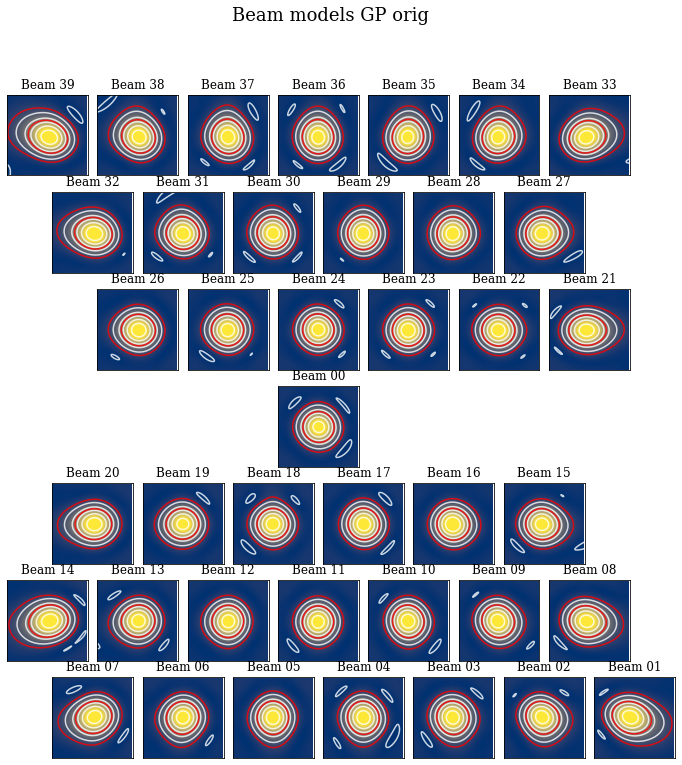

In [17]:
#all beams gaussian comparison

date = '201028'
nrows = 7
ncols = 7*2+1
beams = 40


fig = plt.figure(figsize=(12,12.2))
gs = gridspec.GridSpec(nrows=nrows, ncols=ncols, figure=fig) #, width_ratios=[1]*ncols, height_ratios=[1]*nrows, wspace=0.4, hspace=0.7)

# Arrange the plots approx according to beam spacing (only beam 0 really fails)
ax = [None] * beams
for b in range(beams-1,-1,-1):
    if (b <= 39) & (b >= 33):
        ax[b] = fig.add_subplot(gs[0,2*(39-b):2*(39-b)+2])
    if (b <= 32) & (b >= 27):
        ax[b] = fig.add_subplot(gs[1,2*(32-b)+1:2*(32-b)+2+1])
    if (b <= 26) & (b >= 21):
        ax[b] = fig.add_subplot(gs[2,2*(26-b)+2:2*(26-b)+2+2])
    if (b == 0):
        ax[b] = fig.add_subplot(gs[3,2*3:2*3+2])
    if (b <= 20) & (b >= 15):
        ax[b] = fig.add_subplot(gs[4,2*(20-b)+1:2*(20-b)+2+1])
    if (b <= 14) & (b >= 8):
        ax[b] = fig.add_subplot(gs[5,2*(14-b):2*(14-b)+2])
    if (b <= 7) & (b >= 1):
        ax[b] = fig.add_subplot(gs[6,2*(7-b)+1:2*(7-b)+2+1])
    ax[b].set_xticks([])
    ax[b].set_yticks([])

    
for b in range(beams):    
    hdulist_gaus = fits.open('/tank/denes/cbeams/{:02}_gp_avg_orig.fits'.format(b))
    data_gaus = hdulist_gaus[0].data
    header_gaus = hdulist_gaus[0].header

    ax[b].imshow(data_gaus[800:2300,800:2300], vmin=-0.1, vmax=1.0, cmap='cividis')
    ax[b].set_title('Beam '+str(b).zfill(2))
    #ax[b].scatter(c1,c2,s=2, color='k')
    #ax[b].scatter(c1_o,c2_o,s=2, color='grey')
    ax[b].contour(data_gaus[800:2300,800:2300], levels=np.arange(0.,1.2,0.2), colors='w', alpha=0.8)
    ax[b].contour(data_gaus[800:2300,800:2300], levels=[0.1,0.5], colors='r', alpha=0.8)

    ax[b].invert_yaxis()
    #ax[b].xlim(1000,2100)
    #ax[b].ylim(1000,2100)

fig.suptitle("Beam models GP orig", size=18)  
plt.savefig('/tank/denes/drift_scan/plots/{}_gp_orig.png'.format(date), bbox_inches="tight", dpi=200)


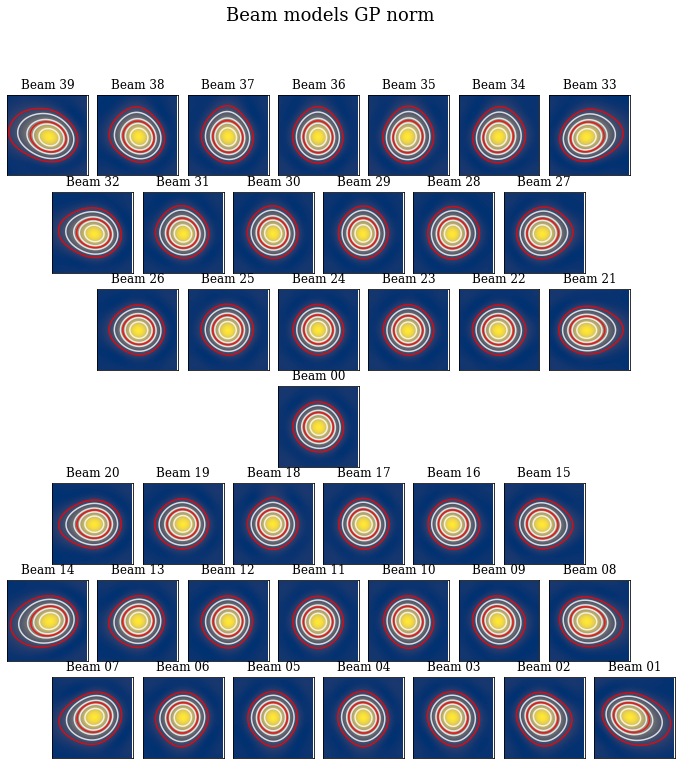

In [19]:
#all beams gaussian comparison

date = '201028'
nrows = 7
ncols = 7*2+1
beams = 40


fig = plt.figure(figsize=(12,12.2))
gs = gridspec.GridSpec(nrows=nrows, ncols=ncols, figure=fig) #, width_ratios=[1]*ncols, height_ratios=[1]*nrows, wspace=0.4, hspace=0.7)

# Arrange the plots approx according to beam spacing (only beam 0 really fails)
ax = [None] * beams
for b in range(beams-1,-1,-1):
    if (b <= 39) & (b >= 33):
        ax[b] = fig.add_subplot(gs[0,2*(39-b):2*(39-b)+2])
    if (b <= 32) & (b >= 27):
        ax[b] = fig.add_subplot(gs[1,2*(32-b)+1:2*(32-b)+2+1])
    if (b <= 26) & (b >= 21):
        ax[b] = fig.add_subplot(gs[2,2*(26-b)+2:2*(26-b)+2+2])
    if (b == 0):
        ax[b] = fig.add_subplot(gs[3,2*3:2*3+2])
    if (b <= 20) & (b >= 15):
        ax[b] = fig.add_subplot(gs[4,2*(20-b)+1:2*(20-b)+2+1])
    if (b <= 14) & (b >= 8):
        ax[b] = fig.add_subplot(gs[5,2*(14-b):2*(14-b)+2])
    if (b <= 7) & (b >= 1):
        ax[b] = fig.add_subplot(gs[6,2*(7-b)+1:2*(7-b)+2+1])
    ax[b].set_xticks([])
    ax[b].set_yticks([])

    
for b in range(beams):    
    hdulist_gaus = fits.open('/tank/denes/cbeams/{:02}_gp_avg_norm.fits'.format(b))
    data_gaus = hdulist_gaus[0].data
    header_gaus = hdulist_gaus[0].header

    ax[b].imshow(data_gaus[800:2300,800:2300], vmin=-0.1, vmax=1.0, cmap='cividis')
    ax[b].set_title('Beam '+str(b).zfill(2))
    #ax[b].scatter(c1,c2,s=2, color='k')
    #ax[b].scatter(c1_o,c2_o,s=2, color='grey')
    ax[b].contour(data_gaus[800:2300,800:2300], levels=np.arange(0.,1.2,0.2), colors='w', alpha=0.8)
    ax[b].contour(data_gaus[800:2300,800:2300], levels=[0.1,0.5], colors='r', alpha=0.8)

    ax[b].invert_yaxis()
    #ax[b].xlim(1000,2100)
    #ax[b].ylim(1000,2100)

fig.suptitle("Beam models GP norm", size=18)
plt.savefig('/tank/denes/drift_scan/plots/{}_gp_norm.png'.format(date), bbox_inches="tight", dpi=200)


In [14]:
# calculate image size in deg:

hdulist_gaus = fits.open('/tank/denes/cbeams/00_gp_avg_orig.fits')
header_gaus = hdulist_gaus[0].header
abs(header_gaus['CDELT1'])

0.00111111115346

In [15]:
header_gaus

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3073                                                  
NAXIS2  =                 3073                                                  
BUNIT   = 'JY/BEAM '  /                                                         
DATE-OBS= '2020-06-24T06:44:56.4'  /                                            
TELESCOP= 'wsrt    '  /                                                         
CRPIX1  =    1.53700000000E+03  /                                               
CDELT1  =   -1.11111115346E-03  /                                               
CRVAL1  =    2.54000000000E+01  /                                               
CTYPE1  = 'RA---NCP'  /                                                         
CRPIX2  =    1.53700000000E+